In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dfLoan = pd.read_csv('loan.csv')

dfLoan.head()

C:\Users\ncjan\AppData\Local\Temp\ipykernel_35396\406510908.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfLoan = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleanup

In [3]:
# Delete all the columns with all null values

columnsNullCount = dfLoan.isnull().sum()

columnsWithAllNullValues = columnsNullCount.loc[columnsNullCount.values == dfLoan.shape[0]].index

dfLoan.drop(columns=columnsWithAllNullValues, inplace=True)

dfLoan.shape

(39717, 57)

In [4]:
#Check for any duplicate rows

dfLoan[dfLoan.duplicated() == True]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [5]:
# Removing columns with zero variance

columnsWithZeroVar = dfLoan.var().sort_values()

columnsToBeRemoved = ['out_prncp', 'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code',
                        'collections_12_mths_ex_med', 'out_prncp_inv']

print(dfLoan.shape)

dfLoan.drop(columns=columnsToBeRemoved, axis=1, inplace=True)

print(dfLoan.shape)

(39717, 57)
(39717, 49)


C:\Users\ncjan\AppData\Local\Temp\ipykernel_35396\569199345.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  columnsWithZeroVar = dfLoan.var().sort_values()


In [6]:
# Remove columns whose data is not available at loan application - thereby not being useful for the prediction

columnsNotUsefulForPrediction = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

dfLoan = dfLoan.drop(columnsNotUsefulForPrediction, axis=1)

In [7]:
# Convert int_rate to numeric
dfLoan['int_rate'] = dfLoan['int_rate'].apply(lambda x: float(x.replace("%", "")))


In [8]:
# Extract year and month from issue date

from datetime import datetime

dfLoan['issue_year'] = dfLoan['issue_d'].apply(lambda dt: datetime.strptime(dt, "%b-%y").year)
dfLoan['issue_month'] = dfLoan['issue_d'].apply(lambda dt: datetime.strptime(dt, "%b-%y").month)

In [9]:
# Convert Employee Tenure length to numeric

def computeTenureLengthInNum(tenure):
    tenx = str(tenure).replace(" years", "").replace(" year","").replace("10+", "10").replace("< 1","0.5")
    return (tenx)

dfLoan['emp_length'] = dfLoan['emp_length'].astype('string')
dfLoan['emp_length_years'] = dfLoan['emp_length'].apply(computeTenureLengthInNum)


In [10]:
dfLoan['term'].value_counts()



 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [11]:
#Remove the current loans as they are not much useful for the analysis

print(dfLoan.shape)

dfLoan = dfLoan[dfLoan['loan_status'] != 'Current']

print(dfLoan.shape)

#Convert Loan status to numeric for better analysis
dfLoan['loan_status'] = dfLoan['loan_status'].apply(lambda ls: 0 if ls == "Fully Paid" else 1)

dfLoan['loan_status'] = dfLoan['loan_status'].astype('category')

print(dfLoan['loan_status'].value_counts())

(39717, 33)
(38577, 33)
0    32950
1     5627
Name: loan_status, dtype: int64


In [12]:
# Create a temp dataframe for defaulted loans

dfDefaultedLoans = dfLoan[dfLoan['loan_status'] == 1]

dfDefaultedLoans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,mths_since_last_delinq,mths_since_last_record,initial_list_status,next_pymnt_d,pub_rec_bankruptcies,issue_year,issue_month,emp_length_years
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,GA,1.00,NaN,NaN,f,NaN,0.0,2011,12,0.5
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,CA,5.55,NaN,NaN,f,NaN,0.0,2011,12,4
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,TX,18.08,NaN,NaN,f,NaN,0.0,2011,12,0.5
12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,...,VA,10.08,NaN,NaN,f,NaN,0.0,2011,12,0.5
14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,...,CA,7.06,NaN,NaN,f,NaN,0.0,2011,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118823,118026,2500,2500,675.0,36 months,12.80,84.00,D,D4,...,NE,20.00,0.0,0.0,f,NaN,NaN,2007,8,0.5
39668,118533,117783,2500,2500,825.0,36 months,9.64,80.26,B,B4,...,NE,20.00,0.0,0.0,f,NaN,NaN,2007,8,0.5
39669,118523,118519,6500,6500,225.0,36 months,15.01,225.37,F,F1,...,GA,6.45,0.0,0.0,f,NaN,NaN,2007,8,9
39678,113179,113093,1000,1000,950.0,36 months,10.59,32.55,C,C2,...,VA,14.47,0.0,0.0,f,NaN,NaN,2007,8,2


In [13]:
dfLoan.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,mths_since_last_delinq,mths_since_last_record,initial_list_status,next_pymnt_d,pub_rec_bankruptcies,issue_year,issue_month,emp_length_years
23753,608782,780921,25000,25000,25000.00000,36 months,13.35,846.57,C,C4,...,VA,23.37,NaN,NaN,f,NaN,0.0,2010,11,0.5
20195,662564,847295,10000,10000,10000.00000,36 months,16.02,351.67,D,D5,...,NC,6.49,28.0,NaN,f,NaN,0.0,2011,1,3
14967,756664,956619,3000,3000,3000.00000,36 months,15.62,104.91,D,D1,...,FL,1.01,NaN,NaN,f,NaN,0.0,2011,5,5
10725,827662,1036628,12500,12500,12500.00000,36 months,5.99,380.22,A,A2,...,MN,19.02,NaN,NaN,f,NaN,0.0,2011,7,5
30440,508481,656090,5500,5500,5500.00000,36 months,10.99,180.05,B,B4,...,IL,18.55,NaN,NaN,f,NaN,0.0,2010,5,1
31960,488665,623303,7000,7000,5925.00000,36 months,7.88,218.97,A,A5,...,FL,6.69,NaN,NaN,f,NaN,0.0,2010,2,0.5
5658,981842,1205022,8000,8000,8000.00000,36 months,6.62,245.63,A,A2,...,NY,15.23,NaN,NaN,f,NaN,0.0,2011,10,4
17627,712502,905610,26000,26000,25746.18516,60 months,12.68,587.33,C,C1,...,NY,4.93,NaN,NaN,f,NaN,0.0,2011,3,10
17817,699676,891263,12000,12000,11750.00000,36 months,7.66,374.16,A,A5,...,CA,12.66,NaN,NaN,f,NaN,0.0,2011,3,0.5
24023,605376,776627,12000,12000,12000.00000,60 months,14.46,282.09,D,D2,...,MA,11.67,NaN,NaN,f,NaN,0.0,2010,10,2


# Data Analysis

In [ ]:
# Define function to draw count plot 
def drawCustomCountPlot(xColumn, hueColumn, yLabel, xLabel, title):
    fig = sns.countplot(data=dfLoan, x=xColumn, hue=hueColumn)
    fig.set(ylabel=yLabel,xlabel=xLabel,title=title)

    plt.legend(['Fully Paid', 'Defaulted'])
    plt.show(fig)

loan_status
0    32950
1     5627
Name: loan_status, dtype: int64


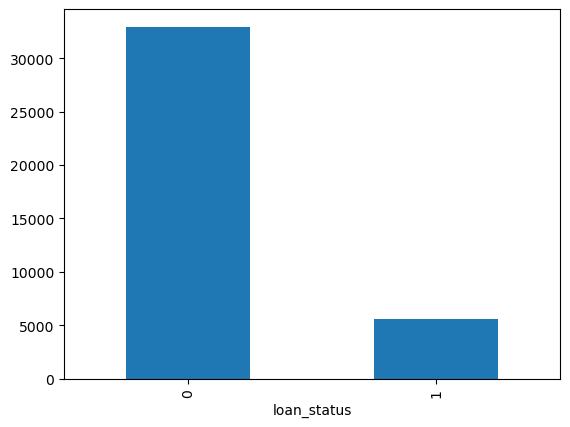

In [14]:
# Draw a bar plot of counts of loan status 
dfLoan.groupby(by="loan_status")['loan_status'].count().plot(kind="bar")

print(dfLoan.groupby(by="loan_status")['loan_status'].count())

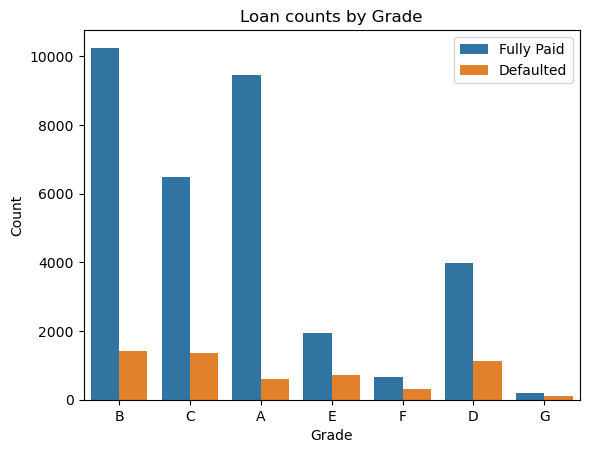

In [37]:
drawCustomCountPlot(xColumn="grade", hueColumn="loan_status", yLabel="Count", xLabel="Grade", title="Loan counts by Grade")

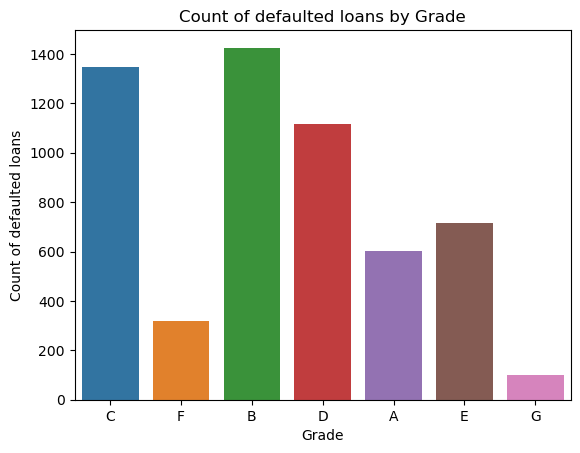

In [15]:
# Understand which of the grades are observing much of the defaulted loans - Grade vs Count of defaulted loans

fig = sns.countplot(x='grade', data=dfDefaultedLoans) 
fig.set(ylabel="Count of defaulted loans", title="Count of defaulted loans by Grade", xlabel="Grade")
plt.show()

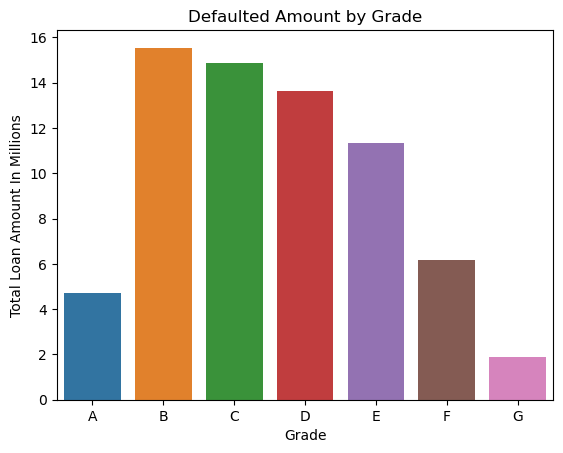

In [16]:
# Understand defaulted amount in relation to Grade

dfLoanAmountByGrade = dfDefaultedLoans.pivot_table(index="grade", aggfunc="sum", values="loan_amnt")
dfLoanAmountByGrade['LoanAmountInMillions'] = dfLoanAmountByGrade['loan_amnt'] / 1000000

figBarPlot = sns.barplot(data=dfLoanAmountByGrade, x=dfLoanAmountByGrade.index, y="LoanAmountInMillions")
figBarPlot.set(ylabel="Total Loan Amount In Millions",title="Defaulted Amount by Grade", xlabel="Grade")
plt.show(figBarPlot)

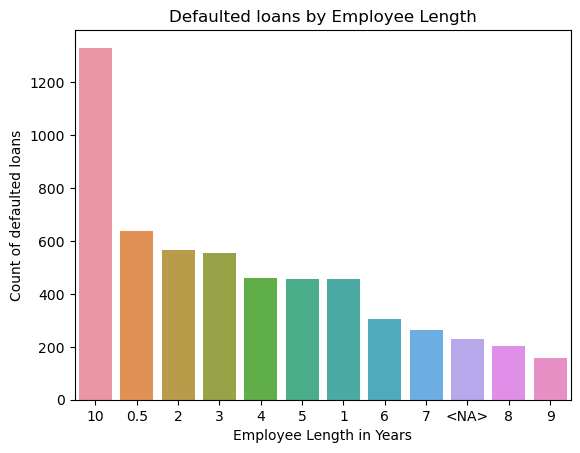

In [17]:
figEmpLength = sns.countplot(x='emp_length_years', data=dfDefaultedLoans, order = dfDefaultedLoans['emp_length_years'].value_counts().index) 
figEmpLength.set(xlabel = "Employee Length in Years", title="Defaulted loans by Employee Length", ylabel="Count of defaulted loans")
plt.show(figEmpLength)

In [18]:
dfLoan.columns.sort_values()

Index(['addr_state', 'annual_inc', 'desc', 'dti', 'emp_length',
       'emp_length_years', 'emp_title', 'funded_amnt', 'funded_amnt_inv',
       'grade', 'home_ownership', 'id', 'initial_list_status', 'installment',
       'int_rate', 'issue_d', 'issue_month', 'issue_year', 'loan_amnt',
       'loan_status', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_record', 'next_pymnt_d', 'pub_rec_bankruptcies',
       'purpose', 'pymnt_plan', 'sub_grade', 'term', 'title', 'url',
       'verification_status', 'zip_code'],
      dtype='object')

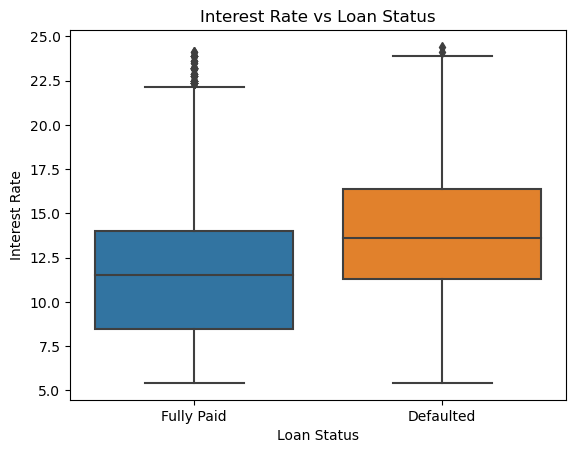

In [19]:
# Understand the relation between interest rate and loan status

figBxPlt = sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=dfLoan)
figBxPlt.set(ylabel="Interest Rate",title="Interest Rate vs Loan Status", xlabel="Loan Status")
plt.xticks([0, 1], ['Fully Paid', 'Defaulted'])

plt.show()

<Axes: >

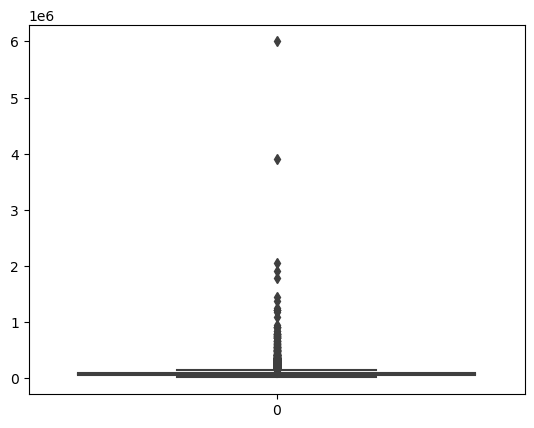

In [20]:
# Univariate analysis of Annual Income

sns.boxplot(dfLoan['annual_inc'])

# Since the data is skewed and there are some outliers in income, we consider only salaries less than 100000

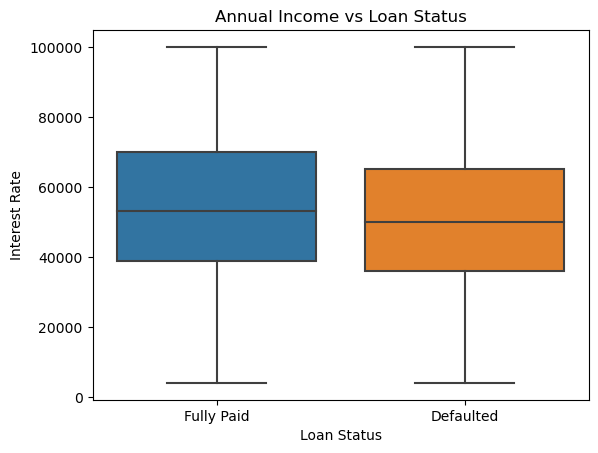

In [21]:
# Understand the relationship between Loan Status and Annual Income

dfLoanWithoutSalaryOutliers = dfLoan[dfLoan['annual_inc'] < 100000]

figBxPltAnnualIncome = sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=dfLoanWithoutSalaryOutliers)

figBxPltAnnualIncome.set(ylabel="Interest Rate",title="Annual Income vs Loan Status", xlabel="Loan Status")
plt.xticks([0, 1], ['Fully Paid', 'Defaulted'])

plt.show()

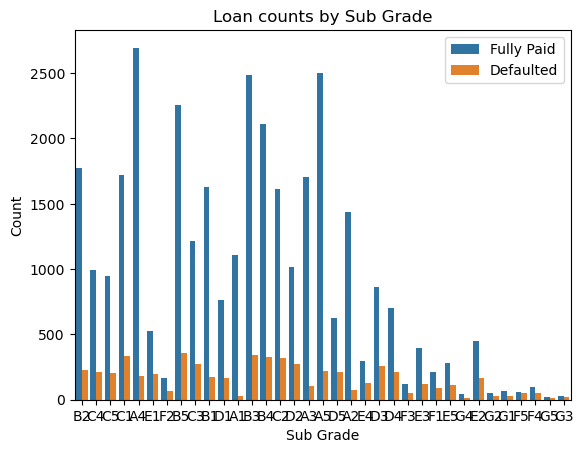

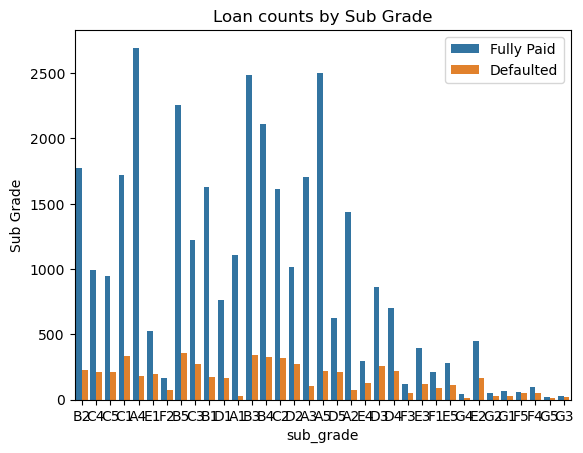

In [36]:
# Understand defaulted amount in relation to Sub Grade
drawCustomCountPlot(xColumn="sub_grade", hueColumn="loan_status", yLabel="Count", xLabel="Sub Grade", title="Loan counts by Sub Grade")

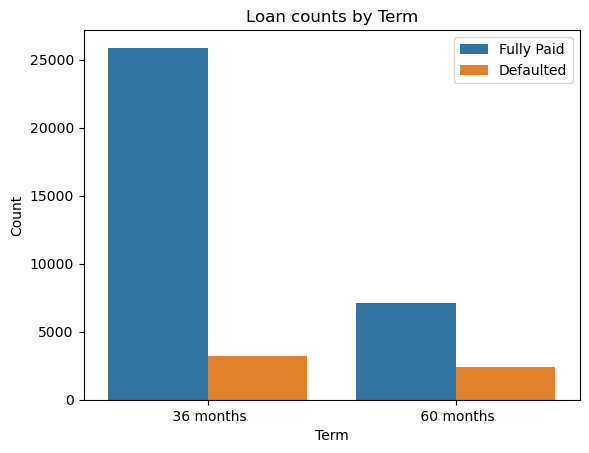

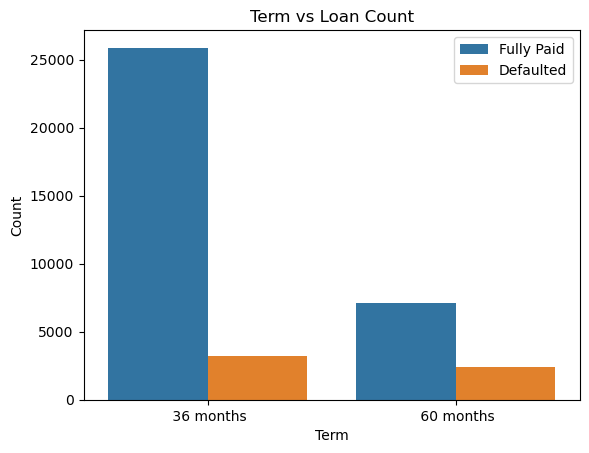

In [35]:
# Understand count w.r.t Term

drawCustomCountPlot(xColumn="term", hueColumn="loan_status", yLabel="Count", xLabel="Term", title="Loan counts by Term")

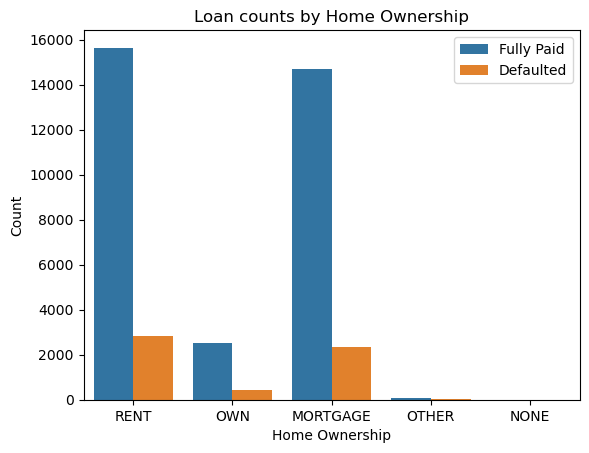

In [38]:
# Understand Loan Status in relation to Home Ownership

drawCustomCountPlot(xColumn="home_ownership", hueColumn="loan_status", yLabel="Count", xLabel="Home Ownership", title="Loan counts by Home Ownership")

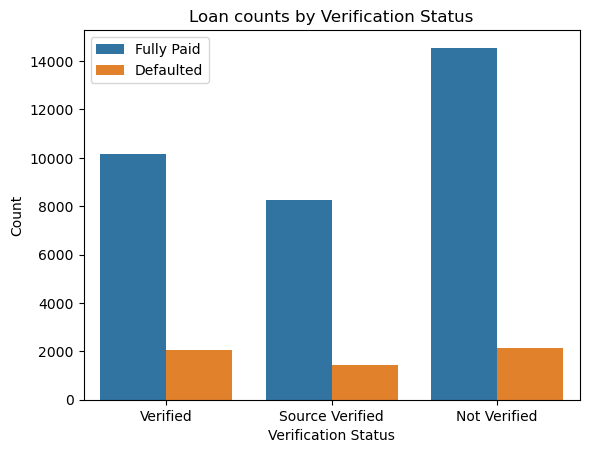

In [28]:
# Understand Loan Status in relation to Verification Status
drawCustomCountPlot(xColumn="verification_status", hueColumn="loan_status", yLabel="Count", xLabel="Verification Status", title="Loan counts by Verification Status")